In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
train_data=pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv")

In [4]:
train_data

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [5]:
train_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [7]:
train_data.shape

(20758, 18)

In [8]:
train_data.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [9]:
train_data.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [10]:
train_data.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [11]:
features=['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [12]:
ytrain_data=train_data['NObeyesdad']

In [13]:
ytrain_data

0        Overweight_Level_II
1              Normal_Weight
2        Insufficient_Weight
3           Obesity_Type_III
4        Overweight_Level_II
                ...         
20753        Obesity_Type_II
20754    Insufficient_Weight
20755        Obesity_Type_II
20756    Overweight_Level_II
20757        Obesity_Type_II
Name: NObeyesdad, Length: 20758, dtype: object

In [14]:
train_df=train_data[features]

In [15]:
train_df.shape

(20758, 8)

In [16]:
ytrain_data.shape

(20758,)

In [17]:
xtrain,xval,ytrain,yval=train_test_split(train_df,ytrain_data,test_size=0.2, random_state=1)

In [18]:
print(xtrain.shape)
print(xval.shape)
print(ytrain.shape)
print(yval.shape)

(16606, 8)
(4152, 8)
(16606,)
(4152,)


In [19]:
model=RandomForestClassifier(n_estimators=100, random_state=42)
model1=DecisionTreeClassifier(max_depth=3, random_state=1)
model2=LogisticRegression()

In [20]:
model

RandomForestClassifier(random_state=42)

In [21]:
model1

DecisionTreeClassifier(max_depth=3, random_state=1)

In [22]:
model2

LogisticRegression()

In [23]:
xtrain=pd.get_dummies(xtrain)
xval=pd.get_dummies(xval)

In [24]:
rfmodel=model.fit(xtrain,ytrain)
dmodel=model1.fit(xtrain,ytrain)
lgmodel=model2.fit(xtrain,ytrain)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
rfpred=rfmodel.predict(xval)
dpred=model1.predict(xval)
lgpred=model2.predict(xval)


In [26]:
rfpred

array(['Obesity_Type_II', 'Insufficient_Weight', 'Overweight_Level_I',
       ..., 'Obesity_Type_III', 'Obesity_Type_III', 'Obesity_Type_III'],
      dtype=object)

In [27]:
dpred

array(['Obesity_Type_II', 'Insufficient_Weight', 'Normal_Weight', ...,
       'Obesity_Type_III', 'Obesity_Type_III', 'Obesity_Type_III'],
      dtype=object)

In [28]:
lgpred

array(['Obesity_Type_II', 'Insufficient_Weight', 'Overweight_Level_I',
       ..., 'Obesity_Type_III', 'Obesity_Type_III', 'Obesity_Type_III'],
      dtype=object)

In [29]:
yval

17392        Obesity_Type_II
14299    Insufficient_Weight
14753     Overweight_Level_I
15306     Overweight_Level_I
16482     Overweight_Level_I
                ...         
13289    Overweight_Level_II
11555          Normal_Weight
10644       Obesity_Type_III
49          Obesity_Type_III
13704       Obesity_Type_III
Name: NObeyesdad, Length: 4152, dtype: object

In [30]:
val_accuracy=accuracy_score(yval,rfpred)
val_accuracy1=accuracy_score(yval,dpred)
val_accuracy2=accuracy_score(yval,lgpred)
print(f'validation accuracy is:{val_accuracy}')
print(f'validation accuracy is:{val_accuracy1}')
print(f'validation accuracy is:{val_accuracy2}')

validation accuracy is:0.8904142581888247
validation accuracy is:0.7155587668593449
validation accuracy is:0.6129576107899807


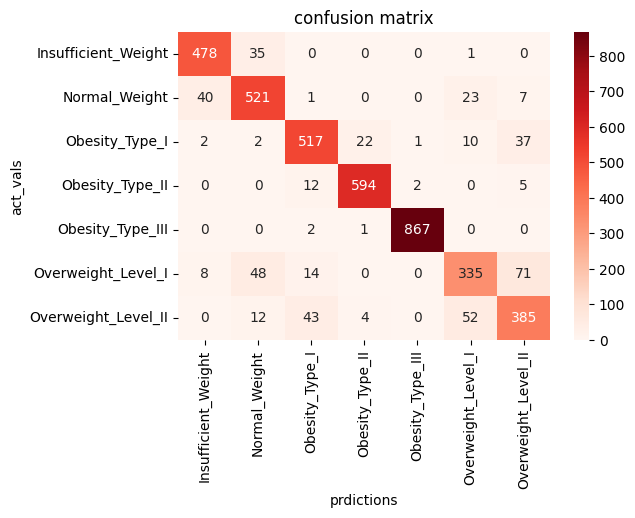

In [31]:
confusion_matrix=pd.crosstab(yval, rfpred, rownames=['act_vals'], colnames=['prdictions'])
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Reds')
plt.title('confusion matrix')
plt.show()

In [32]:
test_data=pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv")

In [33]:
test_data

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
13836,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
13837,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
13838,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


In [34]:
test_df=test_data[features]

In [35]:
test_df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,26.899886,1.848294,120.644178,2.938616,3.000000,2.825629,0.855400,0.000000
1,21.000000,1.600000,66.000000,2.000000,1.000000,3.000000,1.000000,0.000000
2,26.000000,1.643355,111.600553,3.000000,3.000000,2.621877,0.000000,0.250502
3,20.979254,1.553127,103.669116,2.000000,2.977909,2.786417,0.094851,0.000000
4,26.000000,1.627396,104.835346,3.000000,3.000000,2.653531,0.000000,0.741069
...,...,...,...,...,...,...,...,...
13835,23.327836,1.721384,78.030383,2.813234,3.000000,1.000000,0.807076,0.778632
13836,29.000000,1.590000,62.000000,3.000000,3.000000,2.000000,0.000000,0.000000
13837,22.935612,1.585547,44.376637,3.000000,2.273740,2.000000,1.949840,1.000000
13838,21.000000,1.620000,53.000000,2.000000,3.000000,2.000000,3.000000,2.000000


In [36]:
test_df=pd.get_dummies(test_df)

In [37]:
xtrain.shape

(16606, 8)

In [38]:
test_df.shape

(13840, 8)

In [39]:
if 'CALC_Always' in test_df.columns:
    test_df.drop('CALC_Always', axis=1, inplace=True)
test_pred = model.predict(test_df)

In [40]:
prediction=rfmodel.predict(test_df)

In [41]:
prediction

array(['Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_III', ...,
       'Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_II'],
      dtype=object)

In [42]:
result=pd.DataFrame({'id': test_data['id'], 'NObeyesdad': prediction})

In [43]:
result.to_csv('mysubmission_rf1.csv', index=False)

In [44]:
result

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Overweight_Level_I
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight
